In [56]:
pip install beautifulsoup4


SyntaxError: invalid syntax (<ipython-input-56-222eb4ad9aba>, line 1)

In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

<!DOCTYPE html>
<html dir="ltr" lang="en-US"><head>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"e6bbbab7f0","applicationID":"390779195","applicationTime":816.221939,"transactionName":"Z1RQNhBXC0FUWkQIW14ecRcRQgpfGgNcDldRXVddTUEAU0FRVRMbWF5HEABPDV1ASx8NGwpdXQErUg==","queueTime":0,"ttGuid":"ab5768156e5ff0","agentToken":null}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"e6bbbab7f0",applicationID:"390779195"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){return o(e,[u.now()].c
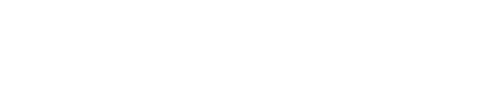
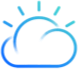

In [58]:
page = requests.get('https://weather.com/weather/hourbyhour/l/2c16c2eb429208dc3995d8693fa1dcce4e151de4e6ea659b8e17e3eff99395a5')
soup = BeautifulSoup(page.content, 'html.parser')
print(soup)

In [59]:
week = soup.find(id="WxuHourlyCard-main-74f43669-10ed-4577-a8c4-85ad9d041036")
print(week)

<div class="removeIfEmpty" id="WxuHourlyCard-main-74f43669-10ed-4577-a8c4-85ad9d041036"><section aria-label="Hourly Weather" class="card Card--card--4VS_Q HourlyForecast--Card--3n4RW" data-testid="HourlyForecast" header="[object Object]"><h1 class="LocationPageTitle--PageHeader--3bC6K HourlyForecast--CardHeader--2DTAD"><strong>Hourly Weather</strong><span class="LocationPageTitle--LocationText--2J81a">-<span class="LocationPageTitle--PresentationName--Injxu" data-testid="PresentationName">Mobile, AL</span></span></h1><div class="HourlyForecast--timestamp--2Q9Cb">As of 2:00 pm CST</div><div class="HourlyForecast--DisclosureList--OznTI"><h3 class="HourlyForecast--longDate--3khKr" id="currentDateId0">Tuesday, February 2</h3><details class="DaypartDetails--DayPartDetail--3yhtR Disclosure--themeList--uBa5q Disclosure--disableBorder--31KZX" data-testid="ExpandedDetailsCard" data-track-string="false" index="0" open="" summarycontentclassname="DaypartDetails--DetailSummaryContent--1c28m"><summ

In [60]:
items = week.find_all(class_='DaypartDetails--DayPartDetail--3yhtR Disclosure--themeList--uBa5q')
print(items[0].find(class_='DetailsSummary--daypartName--1Mebr').get_text())
print(items[0].find(class_='DetailsSummary--temperature--3FMlw').get_text())
print(items[0].find(class_='DetailsSummary--condition--mqdxh').get_text())
print(items[0].find(class_='DetailsSummary--precip--2ARnx').get_text())
print(items[0].find(class_='DetailsSummary--wind--Cv4BH DetailsSummary--extendedData--aaFeV').get_text())

3 pm
55°
SunnySunny
Rain0%
WindNNW 10 mph


In [61]:
time = [item.find(class_='DetailsSummary--daypartName--1Mebr').get_text() for item in items]
temp = [item.find(class_='DetailsSummary--temperature--3FMlw').get_text() for item in items]
condition = [item.find(class_='DetailsSummary--condition--mqdxh').get_text() for item in items]
Rain = [item.find(class_='DetailsSummary--precip--2ARnx').get_text() for item in items]
windspeed = [item.find(class_='DetailsSummary--wind--Cv4BH DetailsSummary--extendedData--aaFeV').get_text() for item in items]

In [62]:
print(time)
print(temp)
print(condition)
print(Rain)
print(windspeed)

['3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am', '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am', '12 pm', '1 pm']
['55°', '54°', '51°', '48°', '45°', '44°', '43°', '41°', '40°', '38°', '37°', '36°', '35°', '34°', '33°', '33°', '37°', '42°', '46°', '49°', '52°', '55°', '57°', '58°', '57°', '55°', '50°', '48°', '45°', '44°', '43°', '42°', '42°', '41°', '41°', '41°', '41°', '42°', '43°', '48°', '55°', '59°', '63°', '64°', '66°']
['SunnySunny', 'SunnySunny', 'SunnySunny', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'Clear NightClear', 'SunnySunny', 'SunnySunny', 'S

In [63]:
weather = pd.DataFrame(
    {  'Time' :time,
        'Temperature' : temp,
         'COndition' : condition,
         'Rain' : Rain,
          'Wind Speed' :windspeed
     })

In [64]:
print(weather)

     Time Temperature                         COndition    Rain  \
0    3 pm         55°                        SunnySunny  Rain0%   
1    4 pm         54°                        SunnySunny  Rain0%   
2    5 pm         51°                        SunnySunny  Rain0%   
3    6 pm         48°                  Clear NightClear  Rain1%   
4    7 pm         45°                  Clear NightClear  Rain1%   
5    8 pm         44°                  Clear NightClear  Rain1%   
6    9 pm         43°                  Clear NightClear  Rain2%   
7   10 pm         41°                  Clear NightClear  Rain2%   
8   11 pm         40°                  Clear NightClear  Rain3%   
9    1 am         38°                  Clear NightClear  Rain4%   
10   2 am         37°                  Clear NightClear  Rain4%   
11   3 am         36°                  Clear NightClear  Rain5%   
12   4 am         35°                  Clear NightClear  Rain5%   
13   5 am         34°                  Clear NightClear  Rain5

In [65]:
weather.to_csv('weather.csv')